In [17]:
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data')

In [18]:
import h5py
import numpy as np
def load_dataset():
    file_name=  os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    file_name=  os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['non-cat','cat']

    return X_train, Y_train, X_test, Y_test, classes

In [19]:
X_train,Y_train, X_test, Y_test, classes = load_dataset()

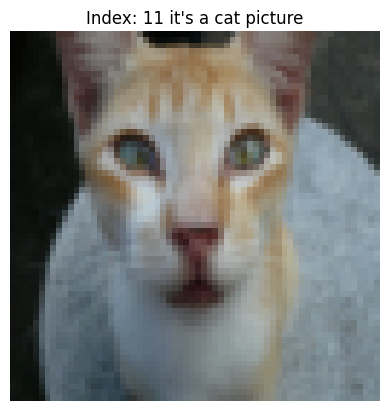

In [20]:
import matplotlib.pyplot as plt
def display_image_with_label(index, dataset, labels, classes):
    plt.imshow(dataset[index])
    plt.title("Index: " + str(index) + " it's a " + str(classes[labels[index]] + " picture"))
    plt.axis('off')  
    plt.show()
index = 11
display_image_with_label(index, X_train, Y_train, classes)

In [21]:
print("X_train.shape=", X_train.shape)
print("X_test.shape=", X_test.shape)
print("Y_train.shape=", Y_train.shape)
print("Y_test.shape=", Y_test.shape)

m_train = X_train.shape[0]
m_test = X_test.shape[0]

num_px = X_train.shape[1]

print("Number of training examples: m_train =", m_train)
print("Number of testing examples: m_test =", m_test)
print("Height/Width of each image: num_px =", num_px)
print("Each image is of size:", (num_px, num_px, 3))

X_train.shape= (209, 64, 64, 3)
X_test.shape= (50, 64, 64, 3)
Y_train.shape= (209,)
Y_test.shape= (50,)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)


In [22]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

Y_train = Y_train.reshape(1, Y_train.shape[0])
Y_test = Y_test.reshape(1, Y_test.shape[0])

print("X_train_flatten shape:", X_train_flatten.shape)
print("Y_train shape:", Y_train.shape)
print("X_test_flatten shape:", X_test_flatten.shape)
print("Y_test shape:", Y_test.shape)

X_train_flatten shape: (12288, 209)
Y_train shape: (1, 209)
X_test_flatten shape: (12288, 50)
Y_test shape: (1, 50)


In [23]:
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

In [24]:
def initialize_parameters(layer_dims):
    np.random.seed(1)
    parameters = {'W': {}, 'b': {}}

    for l in range(1, len(layer_dims)):
        parameters['W'][l] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b'][l] = np.zeros((layer_dims[l], 1))

    return parameters


layer_dims = [2, 3, 5, 1]
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print('W[{}] =\n{}\nb[{}] =\n{}\n'.format(l, params['W'][l], l, params['b'][l]))


W[1] =
[[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539]]
b[1] =
[[0.]
 [0.]
 [0.]]

W[2] =
[[ 0.01744812 -0.00761207  0.00319039]
 [-0.0024937   0.01462108 -0.02060141]
 [-0.00322417 -0.00384054  0.01133769]
 [-0.01099891 -0.00172428 -0.00877858]
 [ 0.00042214  0.00582815 -0.01100619]]
b[2] =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]

W[3] =
[[ 0.01144724  0.00901591  0.00502494  0.00900856 -0.00683728]]
b[3] =
[[0.]]



In [25]:
def forward_propagation_step(A_prev, W, b, activation):
    Z = np.dot(W, A_prev) + b

    if activation == "sigmoid":
        A = sigmoid(Z)
    elif activation == "relu":
        A = relu(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (W, b, A_prev, Z)
    return A, cache

def compute_cost(A_last, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(A_last) + (1 - Y) * np.log(1 - A_last)) / m
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    return cost
    
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def relu(Z):
    return np.maximum(0,Z)

In [26]:
def init_backward_propagation(Y, A_last):

    m = Y.shape[1]
    dL_dA_last = - (np.divide(Y, A_last) - np.divide(1 - Y, 1 - A_last))
    
    return dL_dA_last

In [27]:
def backward_propagation_step(dL_dA, cache, activation):
    W, b, A_prev, Z = cache 

    if activation == "relu":
        dg_dz = relu_backward(Z)
    elif activation == "sigmoid":
        dg_dz = sigmoid_backward(Z)

    assert (dL_dA.shape == dg_dz.shape)
    dL_dZ = dL_dA * dg_dz

    m = A_prev.shape[1]
    dL_dW = np.dot(dL_dZ, A_prev.T) / m
    dL_db = np.sum(dL_dZ, axis=1, keepdims=True) / m
    dL_dA_prev = np.dot(W.T, dL_dZ)

    assert (dL_dA_prev.shape == A_prev.shape)
    assert (dL_dW.shape == W.shape)
    assert (dL_db.shape == b.shape)

    return dL_dA_prev, dL_dW, dL_db

def relu_backward(Z):
    dg_dz = Z > 0
    return dg_dz

def sigmoid_backward(Z):
    s = sigmoid(Z)
    dg_dz = s * (1 - s)
    return dg_dz

In [36]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(L):
        parameters['W'][l + 1] -= learning_rate * grads['W'][l + 1]
        parameters['b'][l + 1] -= learning_rate * grads['b'][l + 1]

    return parameters

In [29]:
def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {'W': {}, 'b': {}}
    costs = []
    m = X.shape[1]

    parameters = initialize_parameters(layers_dims)

    for i in range(num_iterations):
        A1, cache1 = forward_propagation_step(X, parameters['W'][1], parameters['b'][1], "relu")
        A2, cache2 = forward_propagation_step(A1, parameters['W'][2], parameters['b'][2], "sigmoid")

        cost = compute_cost(A2, Y)

        dL_dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dL_dA1, grads['W'][2], grads['b'][2] = backward_propagation_step(dL_dA2, cache2, "sigmoid")
        _, grads['W'][1], grads['b'][1] = backward_propagation_step(dL_dA1, cache1, "relu")

        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0:
            costs.append(cost)

    if print_cost:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

    return parameters

Cost after iteration 0: 0.6930497356599891
Cost after iteration 100: 0.6888319876519634
Cost after iteration 200: 0.6856668440097416
Cost after iteration 300: 0.6827709938885856
Cost after iteration 400: 0.680119776306132
Cost after iteration 500: 0.6776900138588087
Cost after iteration 600: 0.6754639587688591
Cost after iteration 700: 0.6734215687583119
Cost after iteration 800: 0.6715468132917565
Cost after iteration 900: 0.6698256739195368
Cost after iteration 1000: 0.6682394408162727
Cost after iteration 1100: 0.6667790498473106
Cost after iteration 1200: 0.6654295899592242
Cost after iteration 1300: 0.6641854486149101
Cost after iteration 1400: 0.6630387455431814
Cost after iteration 1500: 0.6619801020284828
Cost after iteration 1600: 0.6610025076345568
Cost after iteration 1700: 0.6600986233096023
Cost after iteration 1800: 0.6592624806652959
Cost after iteration 1900: 0.6584871467080728
Cost after iteration 2000: 0.6577638511358741
Cost after iteration 2100: 0.6570922053014464
C

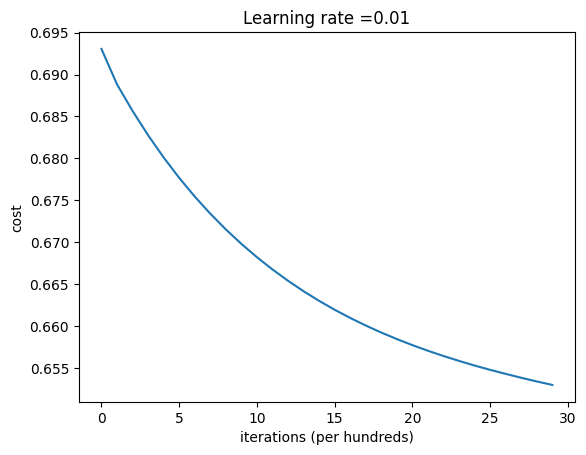

In [30]:
n_x = X_train_scaled.shape[0]
n_h= 7 
n_y = Y_train.shape[0]
layers_dims = [n_x, n_h, n_y]

parameters = two_layer_model(
    X_train_scaled, Y_train, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=True)

In [31]:
def evaluate_two_layers(X, Y, parameters):
    A1, _ = forward_propagation_step(X, parameters['W'][1], parameters['b'][1], "relu")
    Y_pred, _ = forward_propagation_step(A1, parameters['W'][2], parameters['b'][2], "sigmoid")

    predictions = Y_pred > 0.5

    accuracy = np.mean(predictions == Y)
    print("Accuracy: {:.3f}".format(accuracy))
    return accuracy

evaluate_two_layers(X_train_scaled, Y_train, parameters)

test_accuracy = evaluate_two_layers(X_test_scaled, Y_test, parameters)

Accuracy: 0.656
Accuracy: 0.340


In [32]:
def forward_propagation_whole_process(X, parameters):
    caches = {}
    A = X
    L = len(parameters['W'])

    for l in range(1, L):
        A_prev = A
        A, cache = forward_propagation_step(A_prev, parameters['W'][l], parameters['b'][l], "relu")
        caches[l] = cache

    A_last, cache = forward_propagation_step(A, parameters['W'][L], parameters['b'][L], "sigmoid")
    caches[L] = cache

    assert(A_last.shape == (1, X.shape[1]))  # (1, m)
            
    return A_last, caches

In [49]:
def backward_propagation_whole_process(A_last, Y, caches):
    grads = {'dW': {}, 'db': {}, 'dA': {}}
    L = len(caches)
    m = A_last.shape[1]
    Y = Y.reshape(A_last.shape)

    grads['dA'][L] = -(np.divide(Y, A_last) - np.divide(1 - Y, 1 - A_last))

    current_cache = caches[L]
    dA_prev_temp, dW_temp, db_temp = backward_propagation_step(grads['dA'][L], current_cache, "sigmoid")
    grads['dA'][L-1] = dA_prev_temp
    grads['dW'][L] = dW_temp
    grads['db'][L] = db_temp

    for l in reversed(range(1, L)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = backward_propagation_step(grads['dA'][l], current_cache, "relu")
        grads['dA'][l-1] = dA_prev_temp
        grads['dW'][l] = dW_temp
        grads['db'][l] = db_temp

    return grads

In [50]:
def model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, verbose=False):
    print('Training {}-layers neural network with layers dimensions: {}'.format(len(layers_dims)-1, layers_dims))
    np.random.seed(1)
    costs = []

    parameters = initialize_parameters(layers_dims)

    for i in range(num_iterations):

        A_last, caches = forward_propagation_whole_process(X, parameters)

        cost = compute_cost(A_last, Y)

        grads = backward_propagation_whole_process(A_last, Y, caches)

        parameters = update_parameters(parameters, {'W': grads['dW'], 'b': grads['db']}, learning_rate)

        if verbose and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if i % 100 == 0:
            costs.append(cost)

    if verbose:
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate = " + str(learning_rate))
        plt.show()

    return parameters


Training 2-layers neural network with layers dimensions: [12288, 7, 1]
Cost after iteration 0: 0.6930497356599891
Cost after iteration 100: 0.6912447538089296
Cost after iteration 200: 0.6901830169309539
Cost after iteration 300: 0.6891653296765559
Cost after iteration 400: 0.6881765095169662
Cost after iteration 500: 0.6872137766345949
Cost after iteration 600: 0.6862775878881039
Cost after iteration 700: 0.685366880625764
Cost after iteration 800: 0.6844792514420798
Cost after iteration 900: 0.6836147226765449
Cost after iteration 1000: 0.6827723308362942
Cost after iteration 1100: 0.681952780225395
Cost after iteration 1200: 0.6811543238479727
Cost after iteration 1300: 0.6803762537023399
Cost after iteration 1400: 0.6796181207504034
Cost after iteration 1500: 0.6788796519528959
Cost after iteration 1600: 0.6781606732041628
Cost after iteration 1700: 0.6774600234486651
Cost after iteration 1800: 0.6767777336574066
Cost after iteration 1900: 0.6761131555040212
Cost after iteration 20

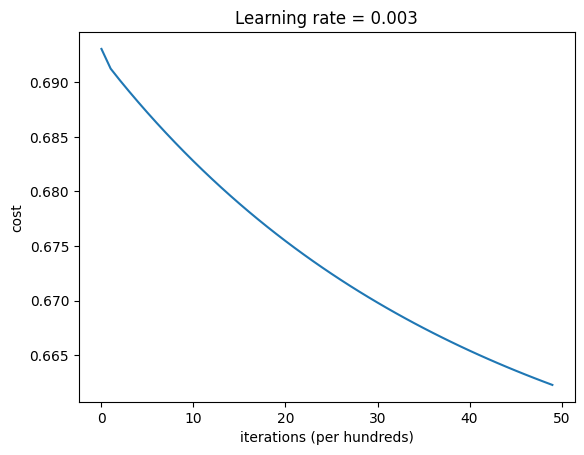

In [51]:
n_x = X_train_scaled.shape[0]
n_h= 7 
n_y = Y_train.shape[0]
layers_dims = [n_x, n_h, n_y]

parameters = model(
    X_train_scaled, Y_train, layers_dims, num_iterations = 5000, verbose = True, 
    learning_rate = 0.003) 

Training 4-layers neural network with layers dimensions: [12288, 20, 7, 5, 1]
Cost after iteration 0: 0.6931489045172448
Cost after iteration 100: 0.6931488970226789
Cost after iteration 200: 0.6931488895640716
Cost after iteration 300: 0.693148882095719
Cost after iteration 400: 0.69314887465407
Cost after iteration 500: 0.6931488672374304
Cost after iteration 600: 0.6931488598097906
Cost after iteration 700: 0.693148852408887
Cost after iteration 800: 0.6931488449273597
Cost after iteration 900: 0.69314883740616
Cost after iteration 1000: 0.6931488298785952
Cost after iteration 1100: 0.6931488223348352
Cost after iteration 1200: 0.6931488148349871
Cost after iteration 1300: 0.6931488072292574
Cost after iteration 1400: 0.693148799575694
Cost after iteration 1500: 0.693148791922132
Cost after iteration 1600: 0.6931487842082741
Cost after iteration 1700: 0.6931487764619355
Cost after iteration 1800: 0.6931487687298248
Cost after iteration 1900: 0.6931487609523154
Cost after iteration 2

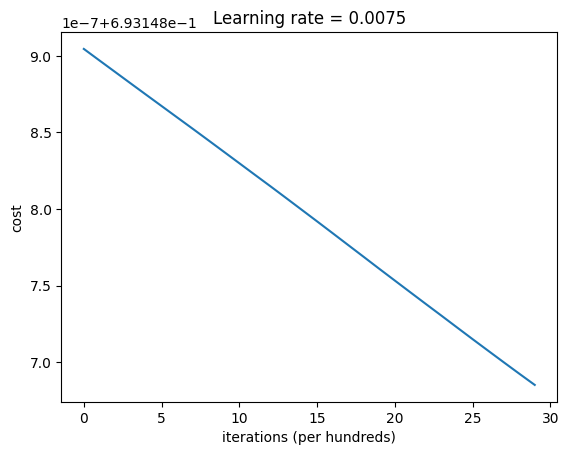

In [44]:
n_x = X_train_flatten.shape[0]
n_y = Y_train.shape[0]
layers_dims = [n_x,20,7,5,n_y]

parameters = model(
    X_train_scaled, Y_train, layers_dims, num_iterations = 3000, verbose = True, 
    learning_rate = 0.0075) 

In [52]:
def predict(X, parameters):

    A_last, _ = forward_propagation_whole_process(X, parameters)

    Y_pred = A_last > 0.5
    
    return Y_pred

In [53]:
Y_pred_train = predict (X_train_scaled, parameters)
Y_pred_test = predict (X_test_scaled, parameters)

print ('Train accuracy = {:.3%}'.format(np.mean (Y_pred_train == Y_train)))
print ('Test accuracy = {:.3%}'.format(np.mean (Y_pred_test == Y_test)))

Train accuracy = 65.550%
Test accuracy = 34.000%
